1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(159487)

eigenvalues:
 [2.6699e+01+0.j 8.2601e-16+0.j 2.1485e+00+0.j]
eigenvectors:
 [[-0.1275 -0.8165  0.5631]
 [-0.5621 -0.4082 -0.7193]
 [-0.8172  0.4082  0.4069]]

eigenvectors_SVD:
 [[-0.1275  0.5631 -0.8165]
 [-0.5621 -0.7193 -0.4082]
 [-0.8172  0.4069  0.4082]]
eigenvalues_SVD: [2.6699e+01 2.1485e+00 2.9699e-16]

 covx.trace(): 28.847440186959137
Lambda.trace(): 28.847440186959133
[0.9255223685710918, 0.07447763142890822, 1.0295169847396193e-17]


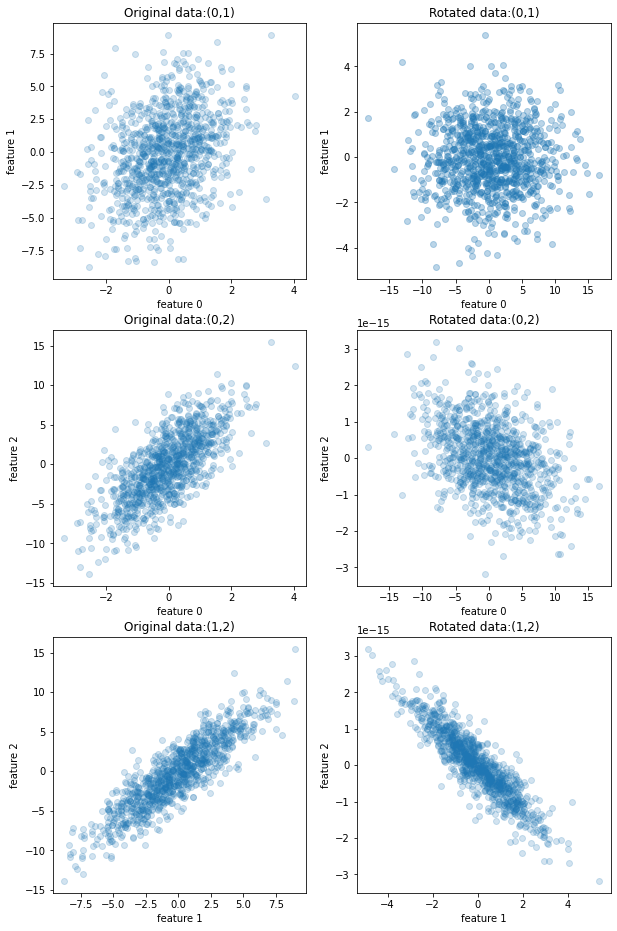

In [2]:
#generation of dataset
%precision 4
N=1000
x1=np.random.normal(0,1, size = N)
x2=x1+ np.random.normal(0,3, size =N)
x3=(2*x1)+x2
#find the eigenvectors and eigenvalues of the cov matrix
X=np.array([x1,x2,x3]) # in this way becouse np.cov need each variable in the row
covx=np.cov(X)
l,V= la.eig(covx)
print("eigenvalues:\n", l)
print("eigenvectors:\n",V)
#same with SVD method of the linalg lib
print()
U, spectr,P = la.svd(covx) #eigen vector given by U
print("eigenvectors_SVD:\n",U)
print("eigenvalues_SVD:",spectr )
#The column of U is ordered such that the relative
#value of the spectrum is sorted in a non-increasing order
#see 
#print(spectr)

Lambda = np.diag(spectr)
#print(Lambda)
print("\n covx.trace():", covx.trace())
print ("Lambda.trace():", Lambda.trace())
print([i/Lambda.trace() for i in spectr])
#note that : 
#print ((Lambda[0,0]+Lambda[1,1])/Lambda.trace()) #>99%(x1 and x3)

#comments on the result:
#since the third component x3 is a linear combination of x1 and x2
#the variability is explained by the first two
#Therefore we get what we expected


#Redefine the data in the basis yielded by the PCA procedure
traspose_U=U.T
Xp = np.dot(traspose_U,X) 

#plots
fig = plt.figure(figsize=(10,16))

plt.subplot(3, 2, 1)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title("Original data:(0,1)")
plt.scatter(X[0,:], X[1,:], alpha=0.2)

plt.subplot(3, 2, 3)
plt.xlabel('feature 0')
plt.ylabel('feature 2')
plt.title("Original data:(0,2)")
plt.scatter(X[0,:], X[2,:], alpha=0.2)

plt.subplot(3, 2, 5)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title("Original data:(1,2)")
plt.scatter(X[1,:], X[2,:], alpha=0.2)

plt.subplot(3, 2, 2)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title("Rotated data:(0,1)")
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.3)

plt.subplot(3, 2, 4)
plt.xlabel('feature 0')
plt.ylabel('feature 2')
plt.title("Rotated data:(0,2)")
plt.scatter(Xp[0,:], Xp[2,:], alpha=0.2)

plt.subplot(3, 2, 6)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title("Rotated data:(1,2)")
plt.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
plt.show()

#observe that the scale of feature 2 is of 1e-15

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

[2.6657e+01+0.j 1.3690e-02+0.j 2.1502e+00+0.j]
covx2.trace(): 28.820749130996788
Lambda2.trace(): 28.82074913099679
[0.9240641061383592, 0.07453608083384662, 0.0004745643475175146]


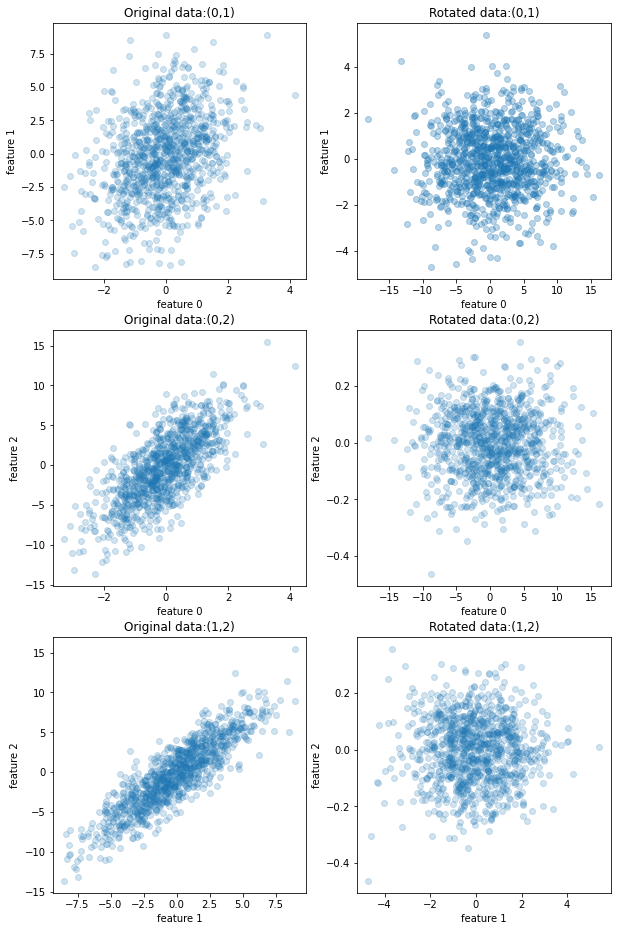

In [3]:
un=10
dev=np.zeros(un)
rumore= np.zeros((un,N))
for i in range(un):
    dev[i]=3*np.random.random_sample()/50 
    rumore[i]=np.random.normal(loc=0.0, scale = dev[i], size =(N))

X2=X.copy()
for i in range(3):
    for j in range(un):
        X2[i]=X2[i]+ rumore[j]
#print(np.shape(X2))

covx2= np.cov(X2)
l2, V2 = la.eig(covx2)
print(l2)

U2,spectr2,Vt2 = la.svd(covx2)

Lambda2=np.diag(spectr2)
print("covx2.trace():",covx2.trace())
print("Lambda2.trace():", Lambda2.trace())
print([i/Lambda.trace() for i in spectr2])

#the percent of total variability is similiar to the old one, as we could expect
Xp2 = np.dot(U2.T, X2)


#plots
fig = plt.figure(figsize=(10,16))

plt.subplot(3, 2, 1)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title("Original data:(0,1)")
plt.scatter(X2[0,:], X2[1,:], alpha=0.2)

plt.subplot(3, 2, 3)
plt.xlabel('feature 0')
plt.ylabel('feature 2')
plt.title("Original data:(0,2)")
plt.scatter(X2[0,:], X2[2,:], alpha=0.2)

plt.subplot(3, 2, 5)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title("Original data:(1,2)")
plt.scatter(X2[1,:], X2[2,:], alpha=0.2)

plt.subplot(3, 2, 2)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title("Rotated data:(0,1)")
plt.scatter(Xp2[0,:], Xp2[1,:], alpha=0.3)

plt.subplot(3, 2, 4)
plt.xlabel('feature 0')
plt.ylabel('feature 2')
plt.title("Rotated data:(0,2)")
plt.scatter(Xp2[0,:], Xp2[2,:], alpha=0.2)

plt.subplot(3, 2, 6)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title("Rotated data:(1,2)")
plt.scatter(Xp2[1,:], Xp2[2,:], alpha=0.2)
plt.show()


#DIFFERENCES:
#The main difference between this graphs and the ones of
#the problem 1) is that in this case the scale of feature 2
#(x3), is 1e-1

#the first case can be considered like an ideal one.
#In, this one with the sum of uncorrelated noises, the PCA
#still work and can distinguish the relevant data from the other

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


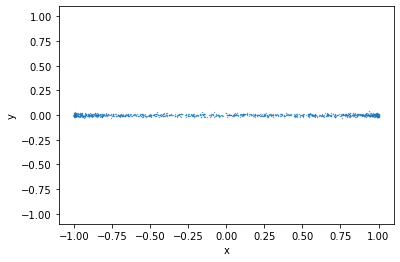

(10, 3, 1000)
camera numero 1 angles : 0.0 ,  0.0
covariance trace: 0.5064381726963135
Lambda trace : (0.5064381726963135+0j)
eigenvalues/Lambda.trace [(0.999816548955903+0j), (0.0001834510440970367+0j), 0j] 



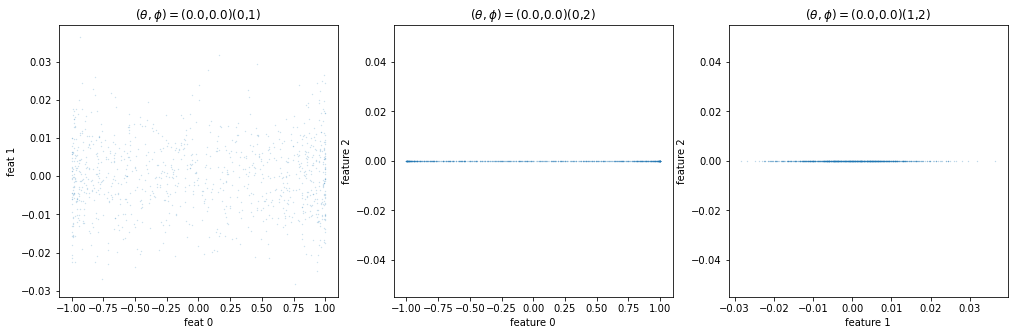

camera numero 2 angles : 0.6283185307179586 ,  0.3141592653589793
covariance trace: 0.5064381726963134
Lambda trace : (0.5064381726963131+0j)
eigenvalues/Lambda.trace [(0.999816548955903+0j), (0.0001834510440968646+0j), (2.2525594610057003e-18+0j)] 



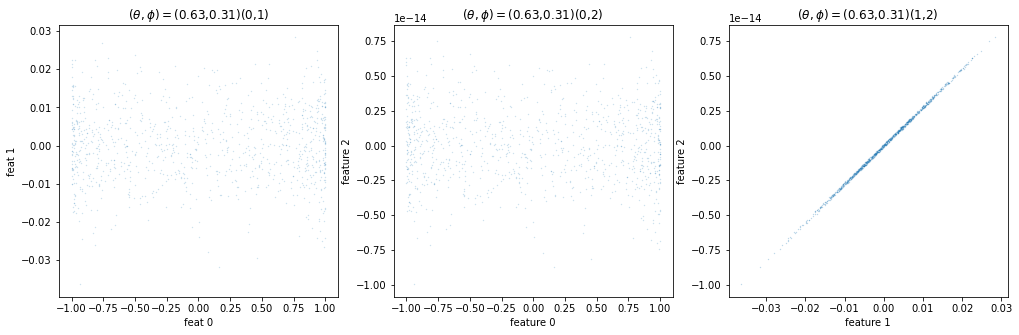

camera numero 3 angles : 1.2566370614359172 ,  0.6283185307179586
covariance trace: 0.5064381726963134
Lambda trace : (0.5064381726963133+0j)
eigenvalues/Lambda.trace [(0.999816548955903+0j), (0.00018345104409698887+0j), (-1.9480040384879664e-17+0j)] 



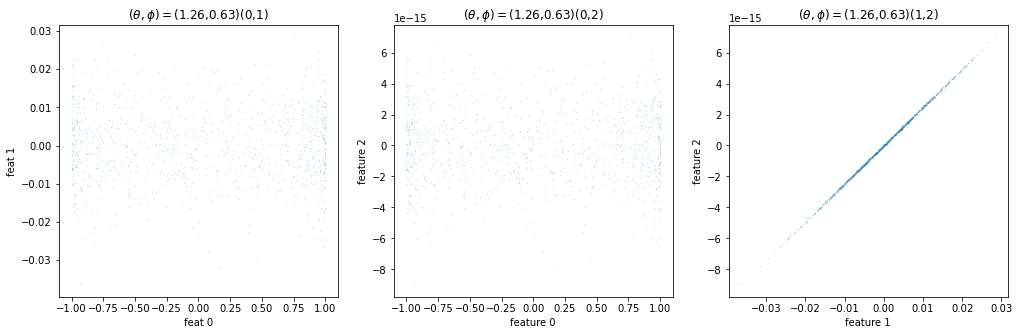

camera numero 4 angles : 1.8849555921538759 ,  0.9424777960769379
covariance trace: 0.5064381726963135
Lambda trace : (0.5064381726963132+0j)
eigenvalues/Lambda.trace [(0.9998165489559028+0j), (0.0001834510440970294+0j), (1.2124732757164877e-16+0j)] 



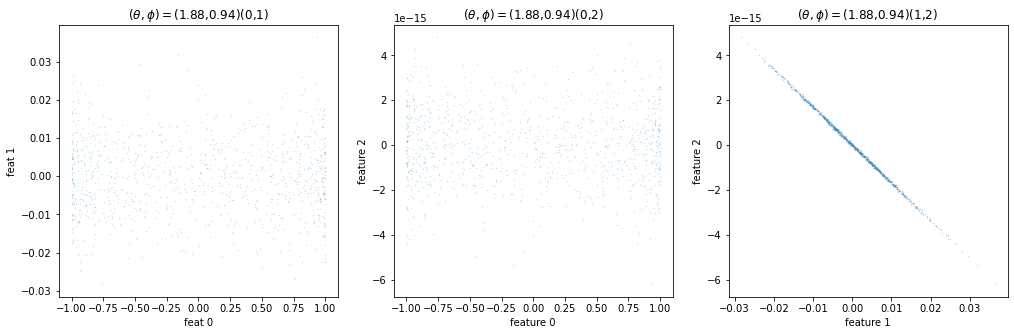

camera numero 5 angles : 2.5132741228718345 ,  1.2566370614359172
covariance trace: 0.5064381726963134
Lambda trace : (0.5064381726963132+0j)
eigenvalues/Lambda.trace [(0.999816548955903+0j), (1.094394090997552e-17+0j), (0.0001834510440969963+0j)] 



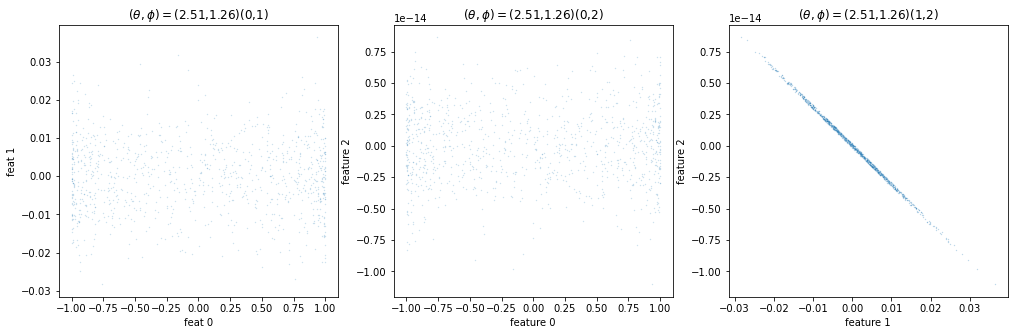

camera numero 6 angles : 3.141592653589793 ,  1.5707963267948966
covariance trace: 0.5064381726963135
Lambda trace : (0.5064381726963132+0j)
eigenvalues/Lambda.trace [(3.752302874193695e-33+0j), (0.999816548955903+0j), (0.00018345104409703676+0j)] 



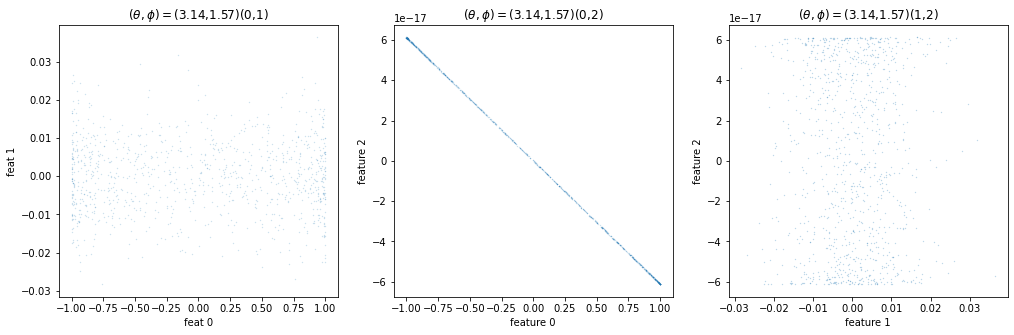

camera numero 7 angles : 3.7699111843077517 ,  1.8849555921538759
covariance trace: 0.5064381726963134
Lambda trace : (0.5064381726963136+0j)
eigenvalues/Lambda.trace [(0.9998165489559029+0j), (-1.5358618971798302e-17+0j), (0.00018345104409708376+0j)] 



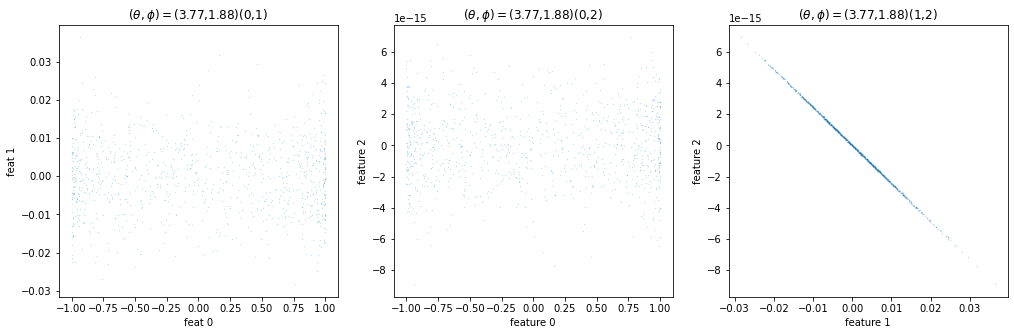

camera numero 8 angles : 4.39822971502571 ,  2.199114857512855
covariance trace: 0.5064381726963134
Lambda trace : (0.5064381726963136+0j)
eigenvalues/Lambda.trace [(0.9998165489559031+0j), (0.00018345104409703232+0j), (2.199882997298139e-17+0j)] 



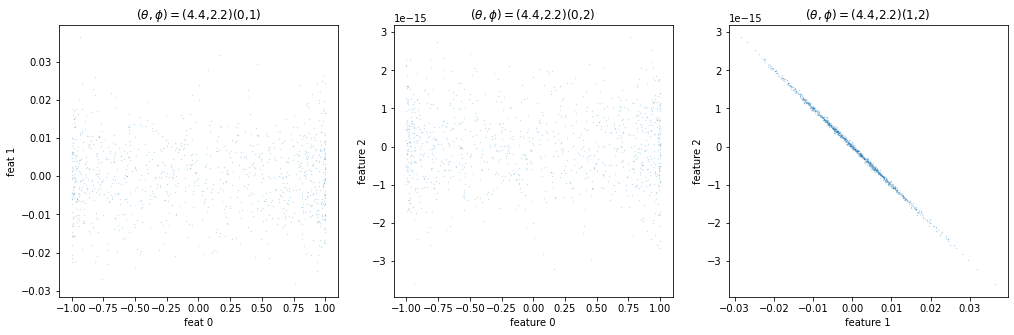

camera numero 9 angles : 5.026548245743669 ,  2.5132741228718345
covariance trace: 0.5064381726963133
Lambda trace : (0.5064381726963133+0j)
eigenvalues/Lambda.trace [(0.999816548955903+0j), (0.00018345104409702484+0j), (7.50320292290286e-18+0j)] 



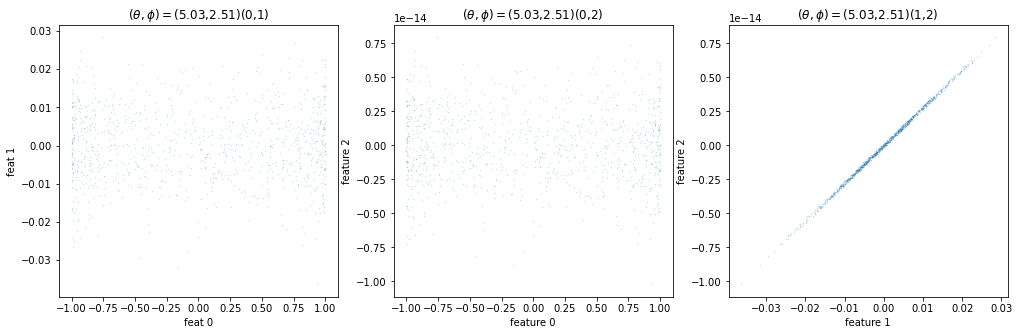

camera numero 10 angles : 5.654866776461628 ,  2.827433388230814
covariance trace: 0.5064381726963134
Lambda trace : (0.5064381726963132+0j)
eigenvalues/Lambda.trace [(0.9998165489559032+0j), (0.00018345104409682567+0j), (-1.1316165643102697e-17+0j)] 



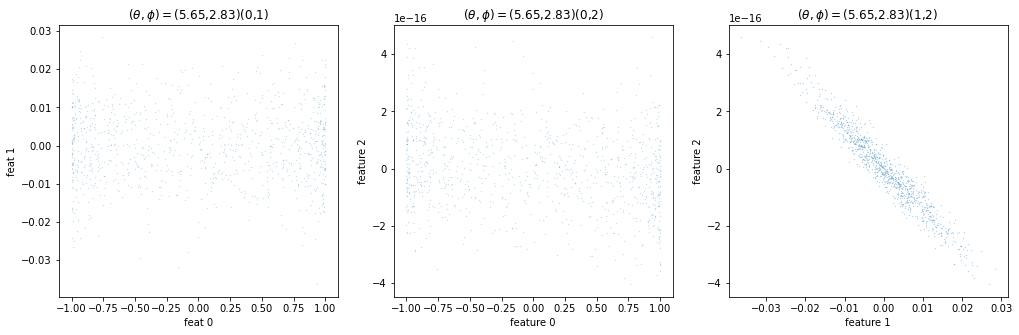

In [4]:
N=1000
ncamera= 10
#assuming ideal spring characterized by w(pulse)
w=0.5*np.pi
casualtime=np.random.uniform(0,2.0,size = N)
x=np.array(np.cos(casualtime*w) )
y=np.random.normal(loc=0.0,scale=0.01,size=N)
z=np.zeros(N)
m_vectors=np.array([x,y,z])

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x,y,s=0.1);
plt.show()
#suppose that the ncamera is equal distanced in the two angles
theta=np.arange (0,2*np.pi,(2.0/ncamera)*np.pi)
phi= np.arange (0,np.pi,(1/ncamera)*np.pi)

#rotation : 

cart_coord= np.array([x,y]) #matrix of coord
#define the rotation matrix of the axis z,x
def matrix_R(theta,phi):
    rotation_z = [[np.cos(theta),-np.sin(theta),0],
           [np.sin(theta),np.cos(theta),0],
           [0,0,1]]
    rotation_y = [[np.cos(phi),0,-np.sin(phi)],
           [0,1,0],
           [np.sin(phi),0,np.cos(phi)]
           ]
    rotation_zy=np.dot(rotation_z,rotation_y)
    return rotation_zy

rot_matr=[]

for the, phis in zip(theta,phi): 
#I am assuming the cameras fixed in a position 
    R=matrix_R(the,phis)
    rot_matr.append(np.dot(R,m_vectors))
    
print(np.shape(rot_matr)) 
#result example of camera 2, x vs y
#plt.scatter(rot_matr[1][0],rot_matr[1][1],s=0.1); 

#PCA:
for i in range(ncamera):
    m_cov = np.cov(rot_matr[i])
    l, V= la.eig(m_cov)
    U,spectr, Vt = la.svd(m_cov)
    Lambda = np.diag(l)
    print("camera numero", i+1,"angles :", theta[i],", ", phi[i])
    print("covariance trace:",m_cov.trace())
    print("Lambda trace :", Lambda.trace())
    print("eigenvalues/Lambda.trace",[j/Lambda.trace() for j in l],"\n")
    #x contain more than the 99 % of the total variability!!
    
    #plots
    Xp = np.dot(U.T,rot_matr[i] )
    fig = plt.figure(figsize=(17,5))
    plt.subplot(1, 3, 1)
    plt.xlabel('feat 0')
    plt.ylabel('feat 1')
    plt.title(r"$(\theta,\phi)=($" + str(round(theta[i],2)) + "," + str(round(phi[i],2)) + ")" + "(0,1)")
    plt.scatter(Xp[0,:], Xp[1,:], alpha=0.3, s=0.1)

    plt.subplot(1, 3, 2)
    plt.xlabel('feature 0')
    plt.ylabel('feature 2')
    plt.title(r"$(\theta,\phi)=($" + str(round(theta[i],2)) + "," + str(round(phi[i],2)) + ")" + "(0,2)")
    plt.scatter(Xp[0,:], Xp[2,:], alpha=0.3, s=0.1)

    plt.subplot(1, 3, 3)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title(r"$(\theta,\phi)=($" + str(round(theta[i],2)) + "," + str(round(phi[i],2)) + ")" +"(1,2)")
    plt.scatter(Xp[1,:], Xp[2,:], alpha=0.4, s=0.1)
    
    plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [5]:
# get the dataset and its description on the proper data directory

#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/Data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/Data/ 

In [6]:
import pandas as pd
#using the panda dataframe
#'/home/daniele/Scrivania/Data/magic04.data'
name=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','classe']
magic = pd.read_csv('/home/daniele/Scrivania/Data/magic04.data',names=name)
#cut down the background(h)
magic_sign = magic[ magic['classe'] == 'g']
#cov() want the feature on the raw
magic_sign_n=magic_sign.iloc[:,:10].T
magic_sign_n
covariance_m = np.cov(magic_sign_n)
l_magic, V_magic = la.eig(covariance_m)
U_magic,spectr_magic, Vt_magic = la.svd(covariance_m)
Lambda = np.diag(l_magic)
print("Eigenvalues:", l_magic)
#print("Eigenvalues:", spectr_magic)#in non-crescent order
variability=[j/Lambda.trace() for j in l_magic]
v_cum=np.cumsum(variability)
print("eigenvalues/Lambda.trace",variability,"\n")
#print(v_cum)


print("the first six feature represent the", v_cum[5], "of the total variability" )

#rotation

magic_rot=np.dot(U_magic.T, magic_sign_n) #rotated data points


Eigenvalues: [5.5359e+03+0.j 1.6876e+03+0.j 9.8952e+02+0.j 3.7945e+02+0.j
 2.6243e+02+0.j 1.8369e+02+0.j 3.8636e+01+0.j 4.2567e-02+0.j
 9.1682e-03+0.j 3.1302e-04+0.j]
eigenvalues/Lambda.trace [(0.609860140867053+0j), (0.1859180978800835+0j), (0.10901093229714999+0j), (0.041802060223533964+0j), (0.028910362703496294+0j), (0.020236336523585714+0j), (0.004256335563724618+0j), (4.689439806827827e-06+0j), (1.0100170156555898e-06+0j), (3.4484550165959254e-08+0j)] 

the first six feature represent the (0.9957379304949024+0j) of the total variability
